In [3]:
import sympy as sp
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# symbols for time and generalized coordinates
t = sp.symbols('t')
theta1, theta2 = sp.Function('theta1')(t), sp.Function('theta2')(t)
phi1, phi2 = sp.Function('phi1')(t), sp.Function('phi2')(t)
L, m, g = sp.symbols('L m g')
tau1, tau2 = sp.Function('tau1')(t), sp.Function('tau2')(t)

In [5]:
# derivatives of the angles
theta1_dot, theta2_dot = sp.diff(theta1, t), sp.diff(theta2, t)
phi1_dot, phi2_dot = sp.diff(phi1, t), sp.diff(phi2, t)

In [6]:
# kinetic and potential energy
T1 = 1/2 * m * (L * theta1_dot)**2 + 1/2 * m * (L * phi1_dot)**2
T2 = 1/2 * m * (L * theta2_dot)**2 + 1/2 * m * (L * phi2_dot)**2
V1 = m * g * L * sp.cos(theta1)
V2 = m * g * L * sp.cos(theta2)
Lagrangian = (T1 + T2) - (V1 + V2)

In [7]:
# euler-lagrange equations
dL_dtheta1 = sp.diff(Lagrangian, theta1)
dL_dtheta1_dot = sp.diff(Lagrangian, theta1_dot)
d_dt_dL_dtheta1_dot = sp.diff(dL_dtheta1_dot, t)
dL_dtheta2 = sp.diff(Lagrangian, theta2)
dL_dtheta2_dot = sp.diff(Lagrangian, theta2_dot)
d_dt_dL_dtheta2_dot = sp.diff(dL_dtheta2_dot, t)
euler_lagrange_eq1 = d_dt_dL_dtheta1_dot - dL_dtheta1 - tau1
euler_lagrange_eq2 = d_dt_dL_dtheta2_dot - dL_dtheta2 - tau2

In [8]:
# numerical simulation
def equations(y, t, m, g, L, tau1_func, tau2_func):
    theta1, theta1_dot, theta2, theta2_dot = y
    theta1_ddot = (tau1_func(t) - m * g * L * np.sin(theta1)) / (m * L**2)
    theta2_ddot = (tau2_func(t) - m * g * L * np.sin(theta2)) / (m * L**2)
    return [theta1_dot, theta1_ddot, theta2_dot, theta2_ddot]


In [9]:
# time vector and initial conditions
t = np.linspace(0, 10, 1000)
y0 = [0, 0, 0, 0]
tau1_func = lambda t: 0.1  # constant torque
tau2_func = lambda t: 0.1  # constant torque
m_value, g_value, L_value = 1.0, 9.8, 1.0

In [10]:
# solve the differential equations
solution = odeint(equations, y0, t, args=(m_value, g_value, L_value, tau1_func, tau2_func))
theta1, theta1_dot, theta2, theta2_dot = solution.T

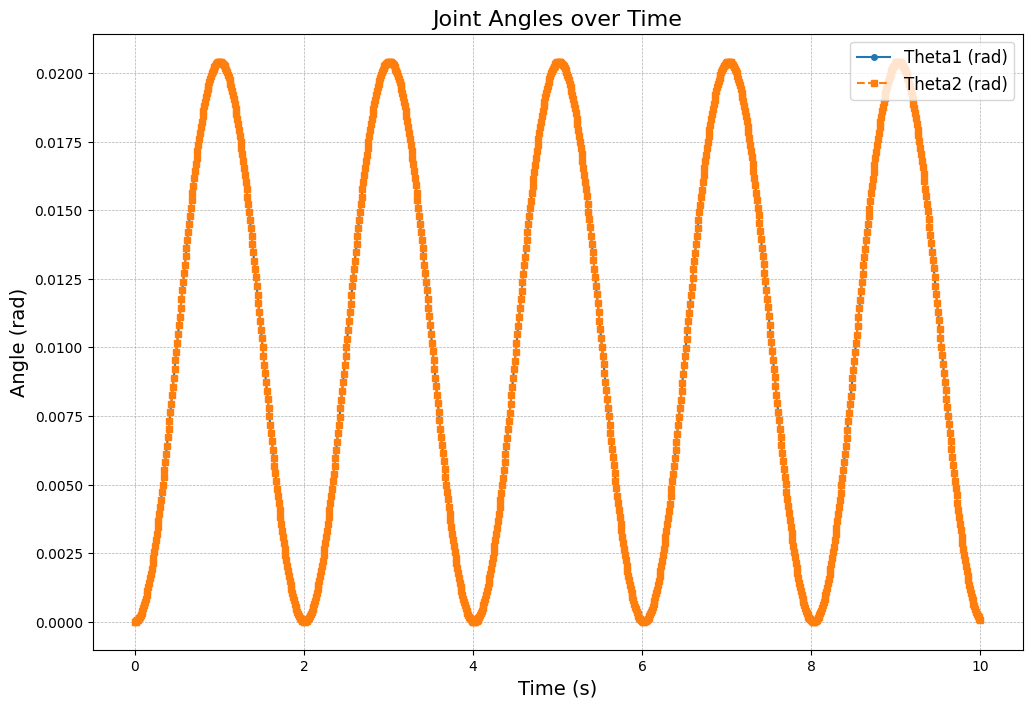

In [11]:
plt.figure(figsize=(12, 8))

plt.plot(t, theta1, label='Theta1 (rad)', linestyle='-', marker='o', markersize=4)

plt.plot(t, theta2, label='Theta2 (rad)', linestyle='--', marker='s', markersize=4)

plt.title('Joint Angles over Time', fontsize=16)

plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Angle (rad)', fontsize=14)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc='upper right', fontsize=12)

plt.show()